In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score 

In [ ]:
wine=pd.read_csv('https://raw.githubusercontent.com/studygyaan/Wine-Quality-Classification/master/winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Text(0.5, 1.0, 'Quality VS Fixed Acidity')

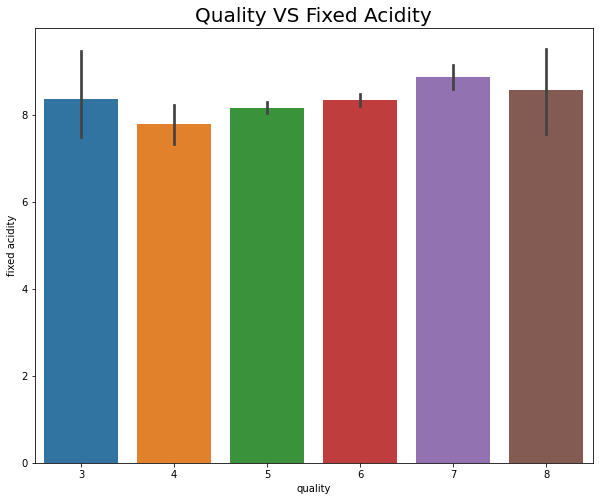

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='quality',y='fixed acidity',data=wine)
plt.title('Quality VS Fixed Acidity',fontsize=20)

Text(0.5, 1.0, 'Quality VS Volatile Acidity')

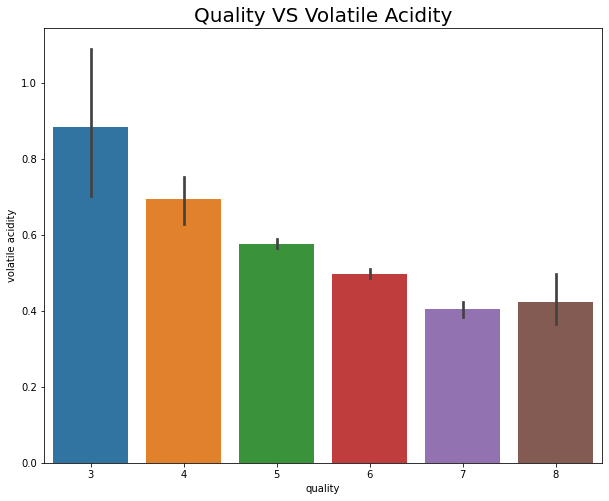

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='quality',y='volatile acidity',data=wine)
plt.title('Quality VS Volatile Acidity',fontsize=20)

Text(0.5, 1.0, 'Quality VS Citric acid')

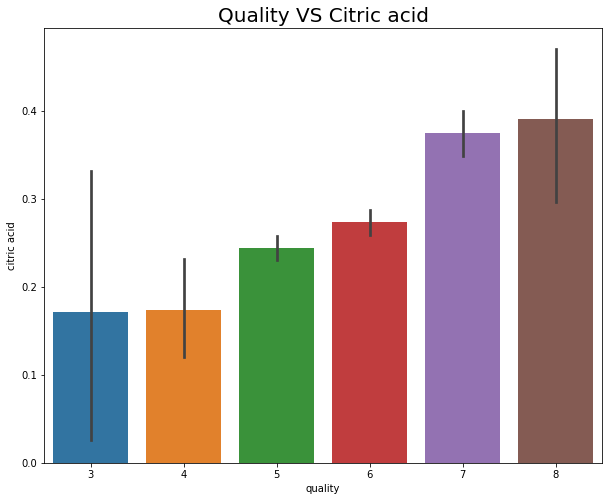

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='quality',y='citric acid',data=wine)
plt.title('Quality VS Citric acid',fontsize=20)

Text(0.5, 1.0, 'Quality VS Residual sugar')

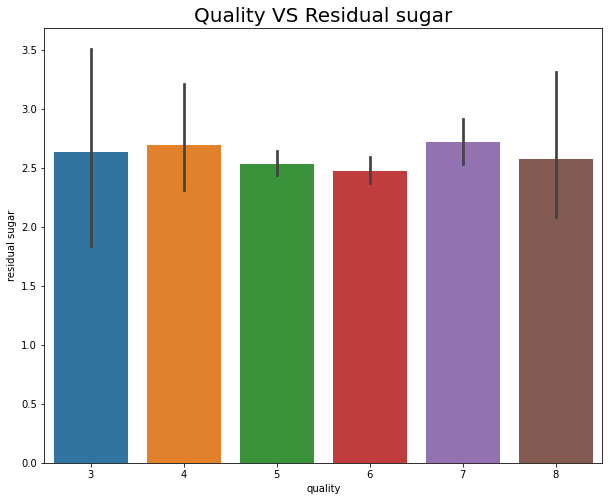

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='quality',y='residual sugar',data=wine)
plt.title('Quality VS Residual sugar',fontsize=20)

Text(0.5, 1.0, 'Quality VS Chlorides')

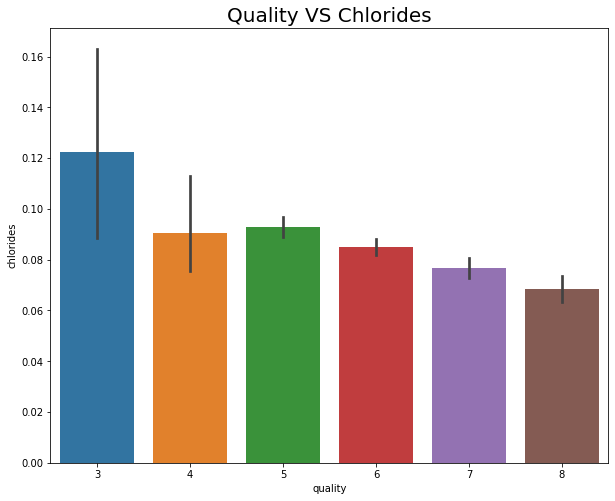

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='quality',y='chlorides',data=wine)
plt.title('Quality VS Chlorides',fontsize=20)

Text(0.5, 1.0, 'Quality VS free sulfur dioxide')

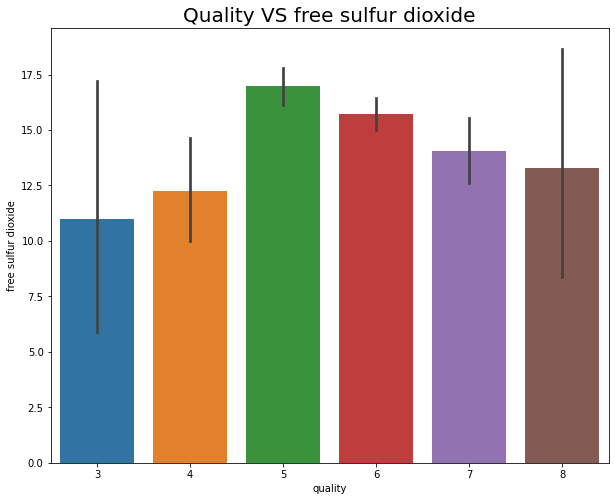

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='quality',y='free sulfur dioxide',data=wine)
plt.title('Quality VS free sulfur dioxide',fontsize=20)

Text(0.5, 1.0, 'Quality VS Total sulfur dioxide')

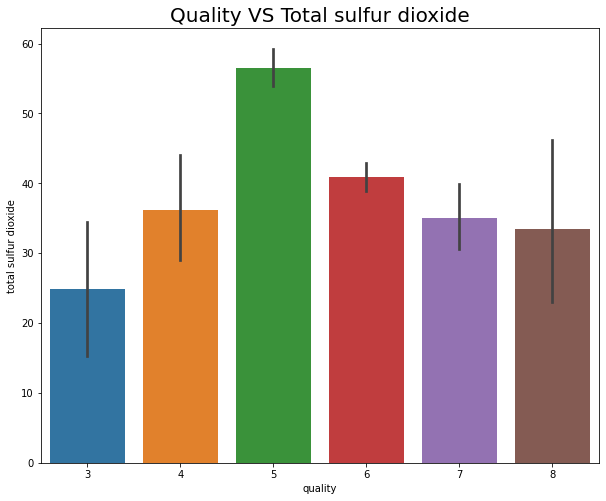

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='quality',y='total sulfur dioxide',data=wine)
plt.title('Quality VS Total sulfur dioxide',fontsize=20)

Text(0.5, 1.0, 'Quality VS Density')

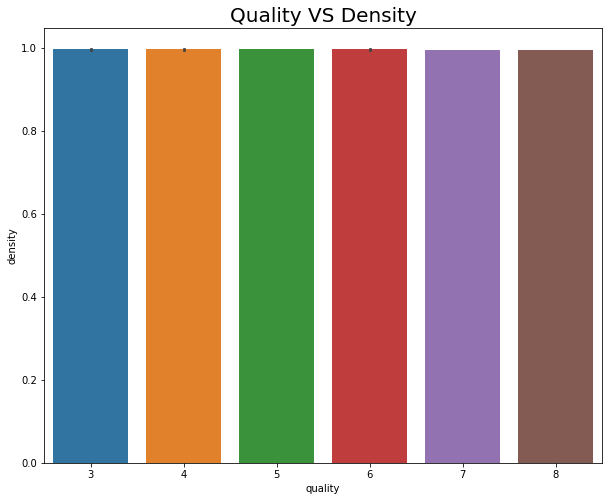

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='quality',y='density',data=wine)
plt.title('Quality VS Density',fontsize=20)

Text(0.5, 1.0, 'Quality VS pH')

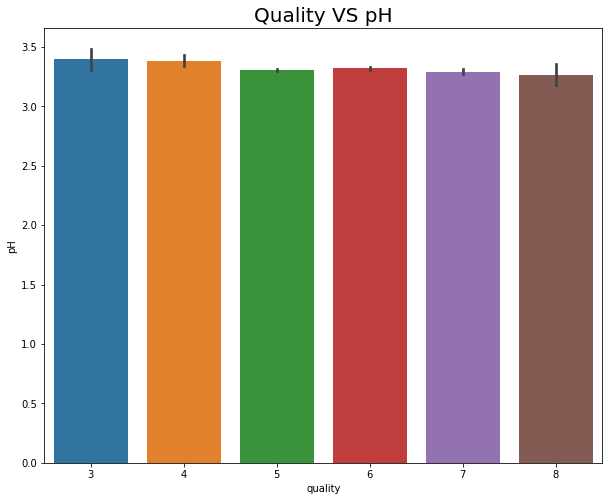

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='quality',y='pH',data=wine)
plt.title('Quality VS pH',fontsize=20)

Text(0.5, 1.0, 'Quality VS Sulphates')

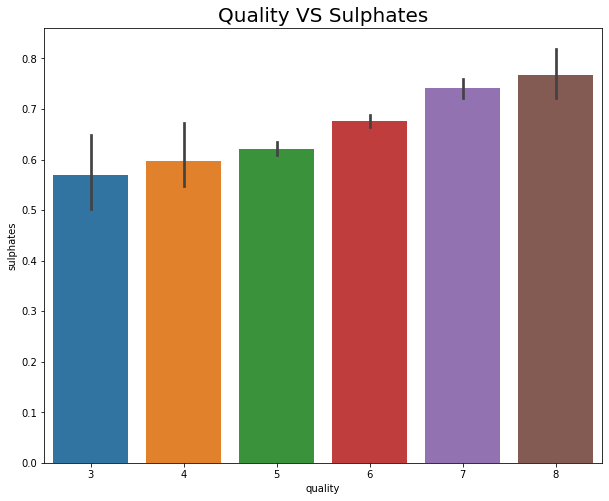

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='quality',y='sulphates',data=wine)
plt.title('Quality VS Sulphates',fontsize=20)

Text(0.5, 1.0, 'Quality VS Alcohol')

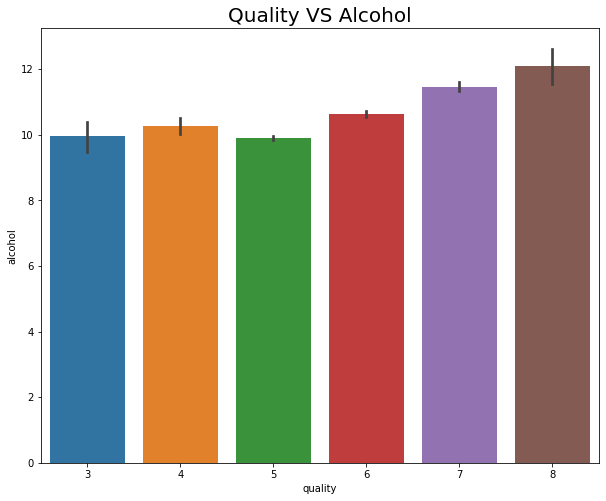

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='quality',y='alcohol',data=wine)
plt.title('Quality VS Alcohol',fontsize=20)

In [ ]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
#pd.cut method converts numerical value to a categorical value.

bins=[2,6.5,8]
classes=['bad','good']
wine['quality']=pd.cut(wine['quality'],bins=bins,labels=classes)

In [ ]:
#LabelEncoder() is used to convert categorial value to numeric value

label_quality=LabelEncoder()
wine['quality']=label_quality.fit_transform(wine['quality'])

In [ ]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


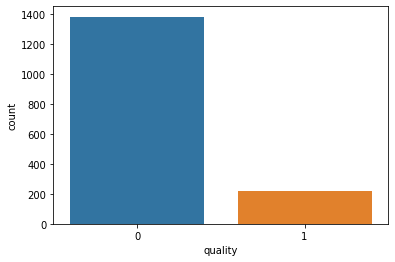

In [ ]:
sns.countplot(wine['quality'])

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
X=wine.drop('quality',axis = 1)
y=wine['quality']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
sc=StandardScaler()

In [ ]:
#standardization

X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

Random Forest Classifier



In [ ]:
RF=RandomForestClassifier(n_estimators=100)
RF.fit(X_train,y_train)
pred_RF=RF.predict(X_test)

In [ ]:
pred1=accuracy_score(y_test,pred_RF)
print(pred1)
print('RandomForest accuracy score:',pred1*100)

0.934375
RandomForest accuracy score: 93.4375


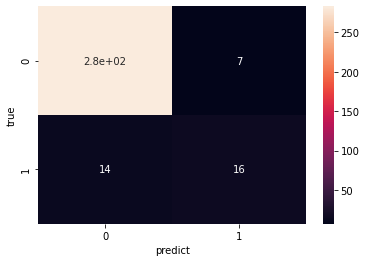

In [ ]:
#confusion matrix
cm=confusion_matrix(y_test,pred_RF)
ax1=sns.heatmap(cm,annot=True)
ax1.set(Xlabel='predict',ylabel='true')
plt.show()

In [ ]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
pred_LR=LR.predict(X_test)

In [ ]:
pred2=accuracy_score(y_test,pred_LR)
print(pred2)
print('Logist Regression accuracy score:',pred2*100)

0.884375
Logist Regression accuracy score: 88.4375


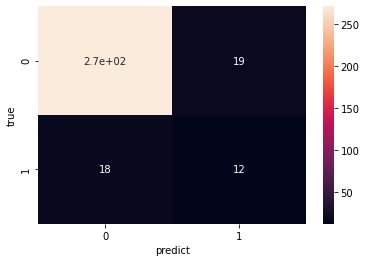

In [ ]:
cm1=confusion_matrix(y_test,pred_LR)
ax2=sns.heatmap(cm1,annot=True)
ax2.set(xlabel='predict',ylabel='true')
plt.show()